In [9]:
import numpy as np
import pandas as pd

path = 'C:/Users/Abdullah Rashid/Desktop/Data Analysis with Python Udemy Course/Pandas+Course+Resources/Pandas Course Resources/retail/transactions.csv'
trans = pd.read_csv(path,names = ['Date', 'Store_Number','Transaction_Count'],skiprows = [0], parse_dates = ['Date'])
trans # initially memory usage was around 2 MB
# trans_copy.xlsx file is created on desktop with sheats named with years 
#with pd.ExcelWriter('C:/Users/Abdullah Rashid/Desktop/trans_copy.xlsx') as writer:
    #for year in range (2013,2018): # For loop 
        #trans.loc[trans['Date'].dt.year == year].to_excel(writer,sheet_name = str(year))
        
# different files with year names will be created, like transactions_2013 etc.

for year in range (2013,2018): # For loop 
    trans.loc[trans['Date'].dt.year == year].to_csv(f"transactions_{year}.csv")
#path1 = 'C:/Users/Abdullah Rashid/Desktop/Data Analysis with Python Udemy Course/python class practice/transactions_2014'
#path2 = 'C:/Users/Abdullah Rashid/Desktop/Data Analysis with Python Udemy Course/python class practice/transactions_2015'

transactions = pd.concat((pd.read_csv('transactions_2014.csv'),
                          pd.read_csv('transactions_2015.csv')),
                         ).drop(['Unnamed: 0'], axis = 1)
transactions

,Date,Store_Number,Transaction_Count
0,2014-01-01,25,840
1,2014-01-01,36,487
2,2014-01-02,1,1875
3,2014-01-02,2,2122
4,2014-01-02,3,3350
...,...,...,...
18341,2015-12-31,49,3828
18342,2015-12-31,50,2948
18343,2015-12-31,51,2892
18344,2015-12-31,53,2300


In [16]:
transactions1 = pd.concat(pd.read_excel('trans_copy.xlsx', sheet_name = [1,2]),
                         ).drop(['Unnamed: 0'], axis = 1)
transactions1


Date  Store_Number  Transaction_Count
1 0     2014-01-01            25                840
  1     2014-01-01            36                487
  2     2014-01-02             1               1875
  3     2014-01-02             2               2122
  4     2014-01-02             3               3350
...            ...           ...                ...
2 18341 2015-12-31            49               3828
  18342 2015-12-31            50               2948
  18343 2015-12-31            51               2892
  18344 2015-12-31            53               2300
  18345 2015-12-31            54               1572

[35484 rows x 3 columns]

In [16]:
import numpy as np
import pandas as pd
path1 = 'C:/Users/Abdullah Rashid/Desktop/Data Analysis with Python Udemy Course/Pandas+Course+Resources/Pandas Course Resources/retail/stores.csv'
path2 = 'C:/Users/Abdullah Rashid/Desktop/Data Analysis with Python Udemy Course/Pandas+Course+Resources/Pandas Course Resources/retail/retail_2016_2017.csv'

stores = pd.read_csv(path1)
retail = pd.read_csv(path2, parse_dates = ['date'])

stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [17]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [18]:
join_df = stores.merge(retail,
                       how = 'outer',
                       left_on = 'store_nbr',
                       right_on = 'store_nbr')
join_df

,store_nbr,city,state,type,cluster,id,date,family,sales,onpromotion
0,1,Quito,Pichincha,D,13,1945944,2016-01-01,AUTOMOTIVE,0.000,0
1,1,Quito,Pichincha,D,13,1945945,2016-01-01,BABY CARE,0.000,0
2,1,Quito,Pichincha,D,13,1945946,2016-01-01,BEAUTY,0.000,0
3,1,Quito,Pichincha,D,13,1945947,2016-01-01,BEVERAGES,0.000,0
4,1,Quito,Pichincha,D,13,1945948,2016-01-01,BOOKS,0.000,0
...,...,...,...,...,...,...,...,...,...,...
1054939,54,El Carmen,Manabi,C,3,3000751,2017-08-15,POULTRY,59.619,0
1054940,54,El Carmen,Manabi,C,3,3000752,2017-08-15,PREPARED FOODS,94.000,0
1054941,54,El Carmen,Manabi,C,3,3000753,2017-08-15,PRODUCE,915.371,76
1054942,54,El Carmen,Manabi,C,3,3000754,2017-08-15,SCHOOL AND OFFICE SUPPLIES,0.000,0


<AxesSubplot:xlabel='city'>

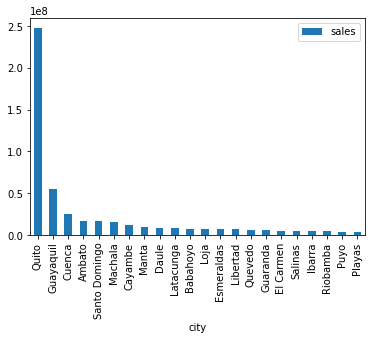

In [22]:
join_df.groupby(['city'])[['sales']].sum().sort_values('sales',ascending = False).plot(kind = 'bar')

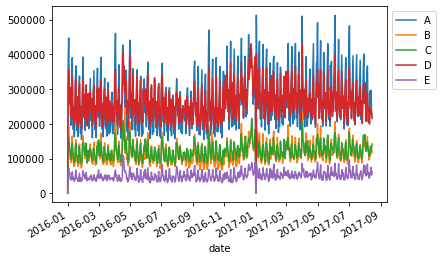

In [40]:
join_df.pivot_table(index = 'date',
                    columns = 'type',
                    values = 'sales',
                    aggfunc = 'sum').plot().legend(bbox_to_anchor = (1,1))

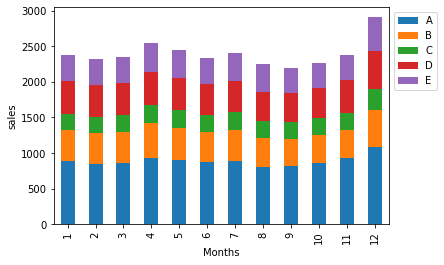

In [38]:
join_df.pivot_table(columns = 'type',
                    index = join_df['date'].dt.month,
                    values = 'sales',
                    aggfunc = 'mean').plot(kind = 'bar',
                                           stacked = 'True',
                                           xlabel = 'Months',
                                           ylabel = 'sales',).legend(bbox_to_anchor = (1,1))

In [42]:
join_df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054944 entries, 0 to 1054943
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   store_nbr    1054944 non-null  int64         
 1   city         1054944 non-null  object        
 2   state        1054944 non-null  object        
 3   type         1054944 non-null  object        
 4   cluster      1054944 non-null  int64         
 5   id           1054944 non-null  int64         
 6   date         1054944 non-null  datetime64[ns]
 7   family       1054944 non-null  object        
 8   sales        1054944 non-null  float64       
 9   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 313.4 MB
